In [ ]:
# Logistic Regression
# Logistic Regression is a machine learning algorithm used for classification, most commonly for binary classification.

# Binary classification means:

# Yes / No
# Pass / Fail
# Spam / Not Spam
# 0 / 1

# Even though it has “regression” in the name, it is actually used to predict categories, not continuous numbers.


## 🟢 Beginner / Conceptual Practice

# 1. You are given a dataset of emails labeled as *spam* or *not spam*.

#    * Why is logistic regression more appropriate than linear regression for this task?

# 2. What does the **sigmoid function** do in logistic regression, and why is it important?

# 3. If a logistic regression model outputs a probability of **0.8**, how would you interpret this in a binary classification problem?

# 4. What happens if you change the **decision threshold** from 0.5 to 0.7?

#    * How does it affect precision and recall?

# ---

# ## 🟡 Data Preparation & Model Building

# 5. You are predicting whether a customer will **churn** based on:

#    * Age
#    * Monthly charges
#    * Contract type

#    **Tasks:**

#    * Which features need encoding and why?
#    * How would you scale the numerical features?

# 6. A dataset has **highly imbalanced classes** (95% negative, 5% positive).

#    * What problems might logistic regression face?
#    * How would you handle this imbalance?

# 7. You notice that your logistic regression model performs well on training data but poorly on test data.

#    * What might be the reason?
#    * How would you fix it?

# ---

# ## 🟠 Model Interpretation & Evaluation

# 8. A feature has a coefficient of **+2.3** in a logistic regression model.

#    * What does this mean in terms of odds?

# 9. How do you interpret a **negative coefficient** in logistic regression?

# 10. Your confusion matrix is:

# ```
# TP = 50, FP = 10
# FN = 30, TN = 910
# ```

# * Calculate accuracy, precision, recall, and F1-score.
# * Is accuracy a good metric here? Why or why not?

# ---

# ## 🔵 Mathematical & Technical Practice

# 11. Write the **logistic regression hypothesis function** and explain each term.

# 12. Why do we use **log loss (binary cross-entropy)** instead of mean squared error?

# 13. How does **L1 regularization** affect feature selection in logistic regression?

# 14. What happens to the coefficients when the regularization strength (λ) is very large?


# ## 🟣 Real-World Scenario-Based Questions

# 15. You are building a medical diagnosis model to predict whether a patient has a disease.

# * Which metric is more important: precision or recall? Why?
# * How would you tune logistic regression accordingly?

# 16. A bank uses logistic regression for **loan default prediction**.

# * What features might cause bias?
# * How would you detect and mitigate this bias?

# 17. Your logistic regression model consistently predicts probabilities close to 0 or 1.

# * What could be causing this?
# * How would you fix it?


# ## 🔴 Coding-Oriented Practice

# 18. Write Python code to:

# * Train a logistic regression model using `scikit-learn`
# * Evaluate it using ROC-AUC

# 19. How would you implement logistic regression **from scratch** using gradient descent?

# 20. Modify a logistic regression model to support **multiclass classification**.


In [ ]:
## Heart Diseases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../../resource/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.columns = df.columns.str.strip()
df['Heart Disease'] = df['Heart Disease'].replace({"Presence": 1, "Absence": 0})

/tmp/ipykernel_45281/3335020242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart Disease'] = df['Heart Disease'].replace({"Presence": 1, "Absence": 0})


In [5]:
num_cols = ["Sex", "BP", "Cholesterol", "Max HR", "ST depression"]
cat_cols = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]

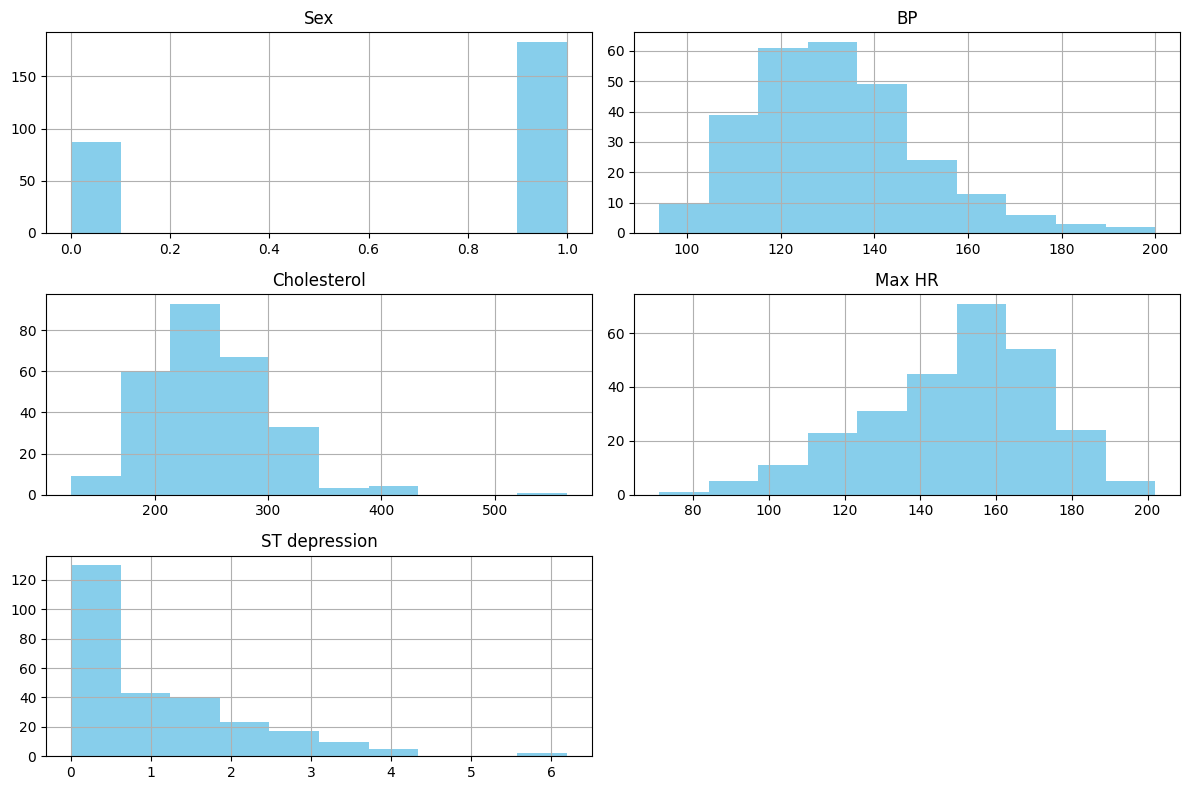

In [6]:
df[num_cols].hist(figsize=(12, 8), color="skyblue")
plt.tight_layout()
plt.show()

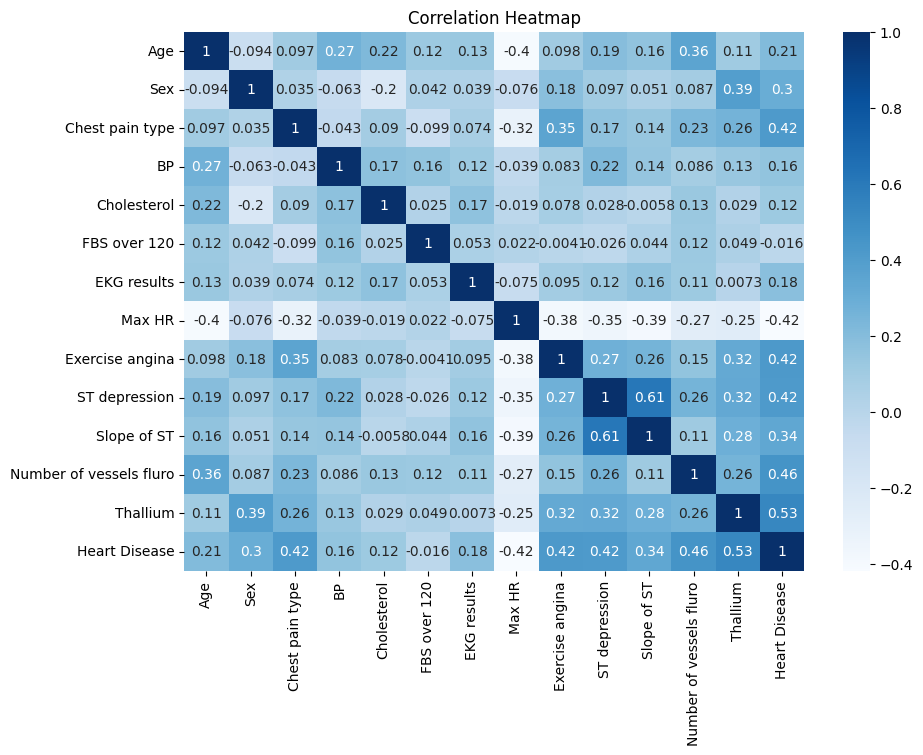

In [7]:
# Correlation using HeatMap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

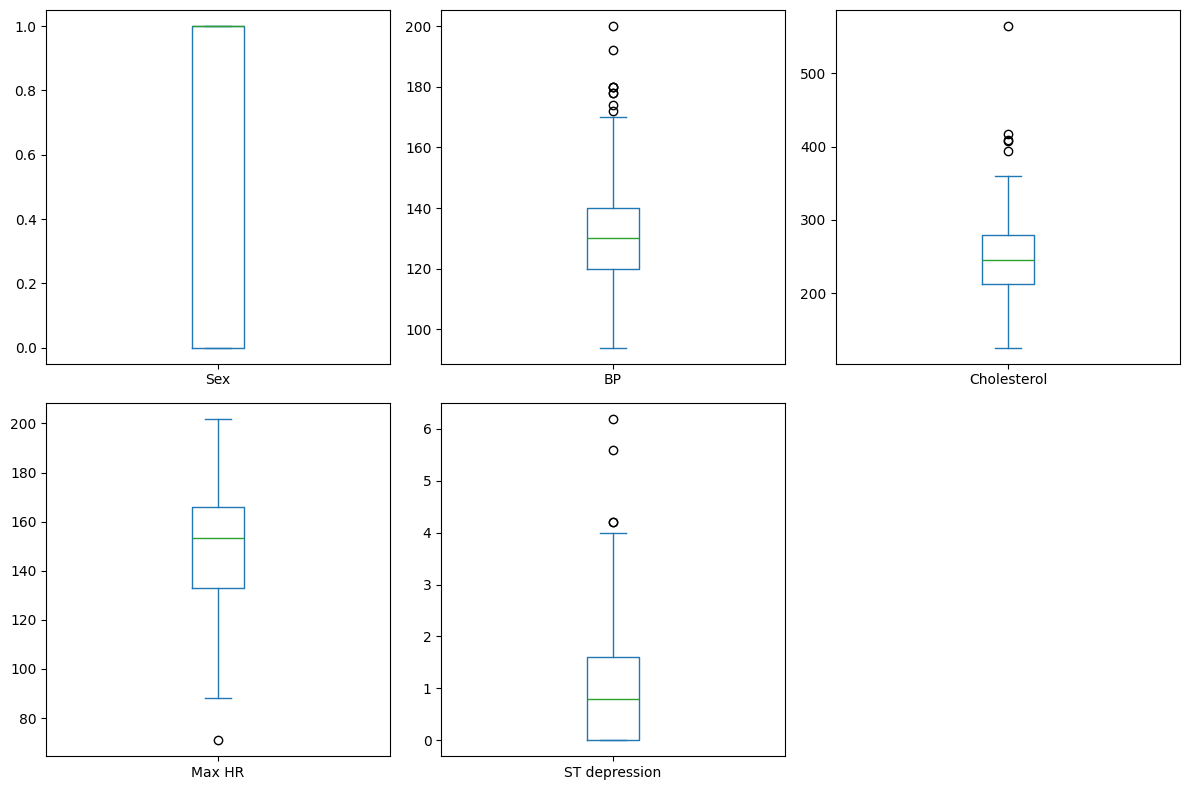

In [8]:
## BOX plots for outliers
# A boxplot identifies potential outliers using statistics, Interquartile Range (IQR)

# What you see on the boxplot

# Box → values between Q1 and Q3
# Line inside box → median
# Whiskers → values within the bounds
# Dots beyond whiskers → outliers

df[num_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [9]:
# Finding the outliers using Q1 and Q3
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < low, low, np.where(df[col] > high, high, df[col]))


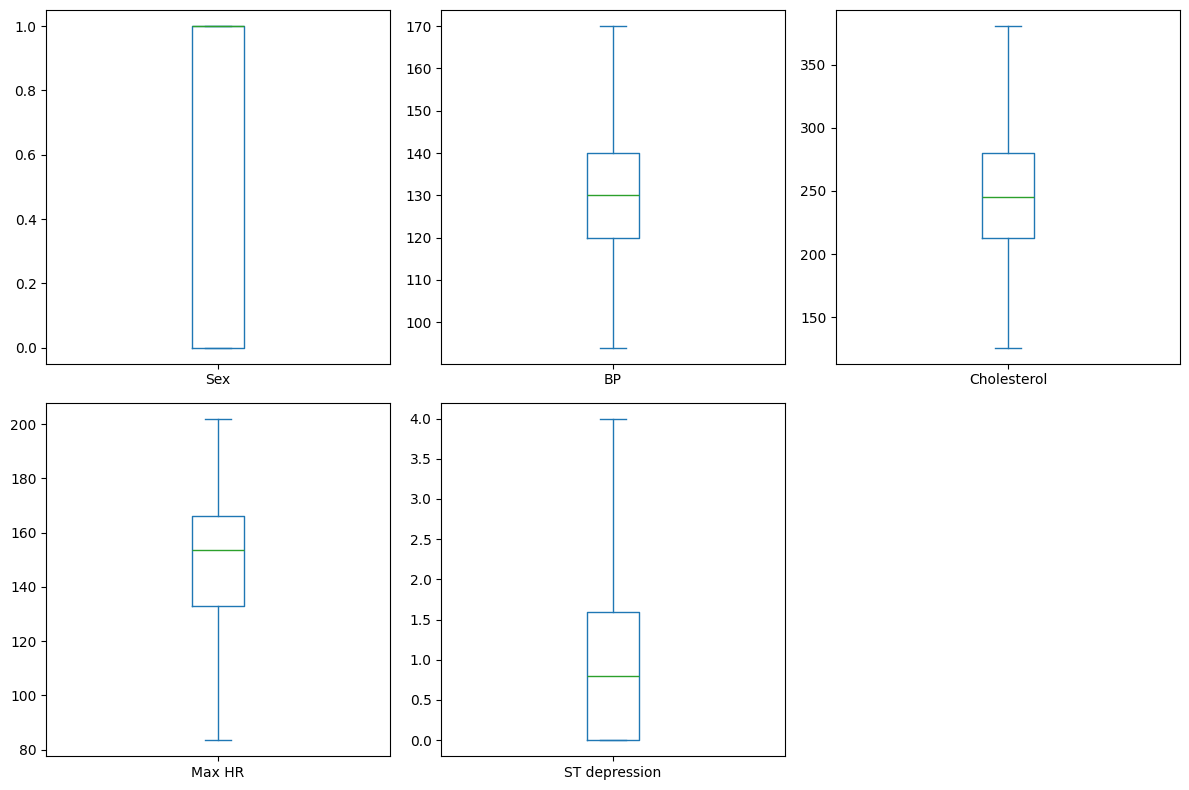

In [10]:
## After removing outliers
df[num_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12, 8))
plt.tight_layout()
plt.show()

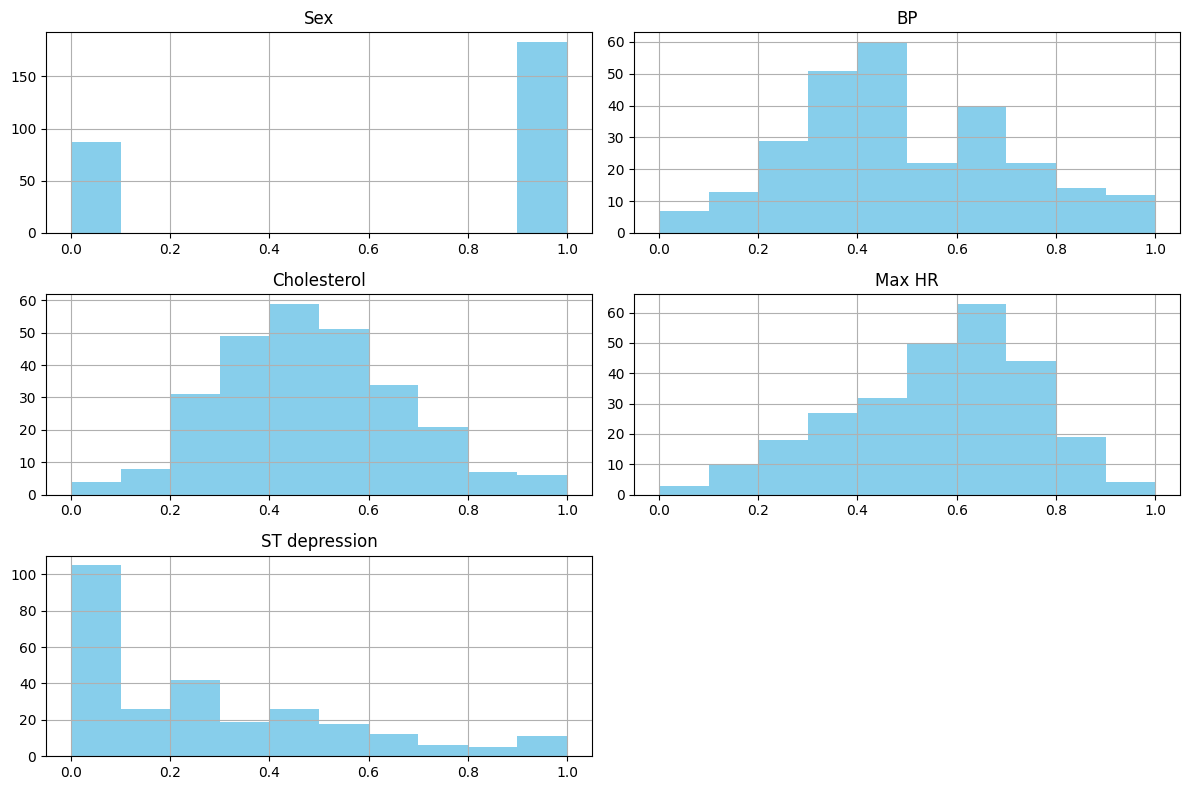

In [11]:
# MinMaxScaler rescales numerical features to a fixed range, usually [0, 1], without changing the shape of the distribution.
# For each feature:

# This transforms:
# Minimum value → 0
# Maximum value → 1
# All other values → between 0 and 1

# Why use MinMaxScaler?

# Makes features comparable in scale

# Required for models sensitive to feature magnitude:

# KNN
# K-Means
# Neural Networks
# Gradient Descent–based models
# Preserves relative distances

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Let me show how it will look like, You can see all the date is underlying between 0 and 1
df[num_cols].hist(figsize=(12, 8), color="skyblue")
plt.tight_layout()
plt.show()

In [12]:
# axis=1 is row wise (and removing all the column data)
# Lets train our model
X = df.drop("Heart Disease", axis = 1)  # Simply remove the label to train the data
y = df['Heart Disease']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 42 means it's reproducible and size will be 80, 20

# Creating Model
# max_iter That message is a scikit-learn convergence warning from LogisticRegression. It means the optimizer hit the iteration limit before finding the best coefficients.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [15]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



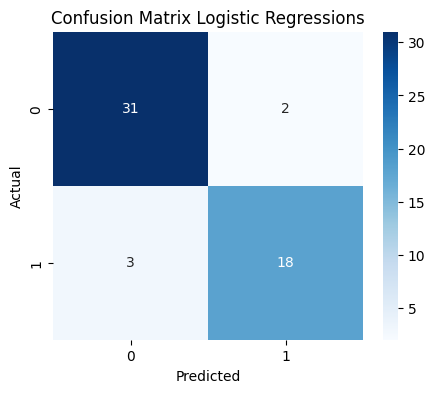

In [16]:
## confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Logistic Regressions")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# 31 → True Negatives (TN): correctly predicted class 0
# 2 → False Positives (FP): predicted 1 but actually 0
# 3 → False Negatives (FN): predicted 0 but actually 1
# 18 → True Positives (TP): correctly predicted class 1

# [[TN  FP]
#  [FN  TP]]

# # Confusion matrix values
# TN = 31
# FP = 2
# FN = 3
# TP = 18

# # Accuracy
# accuracy = (TP + TN) / (TP + TN + FP + FN)

# # Precision
# precision = TP / (TP + FP)

# # Recall (Sensitivity)
# recall = TP / (TP + FN)

# # Specificity
# specificity = TN / (TN + FP)

# # F1 Score
# f1_score = 2 * (precision * recall) / (precision + recall)

# # False Positive Rate
# fpr = FP / (FP + TN)

# # False Negative Rate
# fnr = FN / (FN + TP)


print(confusion_matrix(y_test, preds))
TN, FP, FN, TP = cm.ravel()
print(TN, FP, FN, TP)

[[31  2]
 [ 3 18]]
31 2 3 18
